# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test//2:], newsgroups_test.target[num_test//2:]
dev_data, dev_labels = newsgroups_test.data[:num_test//2], newsgroups_test.target[:num_test//2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [4]:
def P1(num_examples=5):
### STUDENT START ###
    # For each of the num_examples in the train_data, print the example number starting from 1
    # and not 0.  Then print the label name from the data structure newsgroups_train.  Then
    # print the text of the training data.  Then pring a new line.
    for i in range(num_examples):
        print('EXAMPLE %1d: LABEL = %s' % (i+1, newsgroups_train.target_names[train_labels[i]]))
        print('TEXT follows:')
        print(train_data[i])
        print()

### STUDENT END ###
P1()

EXAMPLE 1: LABEL = comp.graphics
TEXT follows:
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

EXAMPLE 2: LABEL = talk.religion.misc
TEXT follows:


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrati

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [4]:
def P2():
### STUDENT START ###
    # Create a CountVectorizer object that will transform the text data into a feature vector
    cv = CountVectorizer()
    # Transform the train_data into a feature vector
    feature_vector = cv.fit_transform(train_data)
    
    # Question 2a
    # Store the number of non-zero entries in variable nz
    nz = feature_vector.nnz*1.0
    # Store the number of examples in the feature_vector in variable examples
    examples = feature_vector.shape[0]
    # Store the number of vocabulary words in the feature_vector in variable vocab
    vocab = feature_vector.shape[1]
    # Store the number of entries in the feature_vector in variable total
    total = examples * vocab
    # Print the supporting variables that will help answer the questions
    print('The number of non-zero entries (Non-Zero): %d' % (nz))
    print('Total number of examples in feature_vector (Examples): %d' % (examples))
    print('Total number of entries in feature_vector (Total): %d' % (total))
    # Print the size of the vocabulary
    print('QUESTION a.i: The size of the vocabulary is: %d' % (vocab))
    # Print the average number of non-zero features per example
    print('QUESTION a.ii: The average # of non-zero features per example is (Non-Zero/Examples): %f' % (nz/examples))
    # Print the fraction of entries that are non-zero
    print('QUESTION a.iii: The fraction of entries that are non-zero is (Non-Zero/Total): %f \n' % (nz/total))

    #Question 2b
    # Store the 0th and last feature strings in the variables zeroth and last
    zeroth =  cv.get_feature_names()[0]
    last =  cv.get_feature_names()[-1]
    # Print the 0th and last feature strings
    print("QUESTION b.i: The 0th and last feature strings (in alphabetical order) are: '%s' and '%s' \n" % (zeroth, last))
    
    #Question 2c
    # Store the 4-word vocabulary in the variable called vocabulary
    vocabulary = ["atheism", "graphics", "space", "religion"]
    # Create a new CountVectorizer object called cv2
    cv2 = CountVectorizer(vocabulary=vocabulary)
    # Transform the train_data into a feature vector
    feature_vector2 = cv2.fit_transform(train_data)
    # Store the number of non-zero entries in variable nz2
    nz2 = feature_vector2.nnz*1.0
    print('The number of non-zero entries (Non-Zero): %d' % (nz2))
    # Print the shape of the new feature vector
    print('QUESTION c.i:  The shape of the new feature vector is (%d, %d)' % feature_vector2.shape)
    # Print the average number of non-zero features per example
    print('QUESTION c.ii: The average # of non-zero features per example is (Non-Zero/Examples): %f \n' % (nz2/examples))
   
    #Question 2d
    # Create a CountVectorizer object that produces 2-grams and 3-grams only
    bi_tri = CountVectorizer(ngram_range=(2,3))
    # Transform the train_data into a feature vector
    feature_vector3 = bi_tri.fit_transform(train_data)
    # Store the number of vocabulary words in the feature_vector in variable vocab3
    vocab3 = feature_vector3.shape[1]
    # Print the size of the vocabulary
    print('QUESTION d.i: The size of the 2-gram, 3-gram vocabulary is: %d' % (vocab3))
    # Store the analyzer object used by the bi_tri CountVectorizer
    bi_tri_analyzer = bi_tri.build_analyzer()
    print("QUESTION d.ii Example output of the 2-gram, 3-gram analyzer for the string '207 is very cool'")
    for s in bi_tri_analyzer("207 is very cool"):
        print("'" + s + "',",)
    print('\n')
    
    #Question 2e
    # Create a CountVectorizer object that prunes words that appear in fewer than 10 documents
    cv10 = CountVectorizer(min_df=10)
    # Transform the train_data into a feature vector
    feature_vector10 = cv10.fit_transform(train_data)
    # Store the number of vocabulary words in the feature_vector in variable vocab10
    vocab10 = feature_vector10.shape[1]
    # Print the size of the vocabulary
    print('QUESTION e.i: The size of the min_df=10 vocabulary is: %d \n' % (vocab10))
    
    #Question 2f
    # From Todd Holloway:  this is the ratio we need to find:
    # (words in dev vocab but not in training vocab) / (words in dev vocab)
    # Create a CountVectorizer object that will transform the text data into a feature vector
    cv_dev = CountVectorizer()
    # Transform the dev_data into a feature vector
    feature_vector_dev = cv_dev.fit_transform(dev_data)
    # Store the number of vocabulary words in the feature_vector in variable vocab_dev
    vocab_dev = feature_vector_dev.shape[1]
    
    # Convert training feature names to a set.  Using the set object saves time when doing the 'not in'
    # query below.
    trainf = set(cv.get_feature_names())
    # Create a variable for the dev feature names to save typing space
    devf = cv_dev.get_feature_names()
    # Loop through the words in the dev features and check if each one is NOT also in the training features.
    # store a list of everything that is in dev but not in train.  Then take the length of that list and store
    # it in the count_dev_only variable which represents the words in dev but not in train.
    count_dev_only = len([word for word in devf if word not in trainf])
    # Calculate the fraction of the words found only in the dev vocab divided by the total words in the dev vocab.
    dev_only_fract = count_dev_only/float(vocab_dev)
    print('Number of words ONLY in dev vocab, but not training vocab (Dev-Only): %d' % (count_dev_only))
    print('Total number of words in dev vocab (Dev-Total): %d' % (vocab_dev))
    print('QUESTION f.i:  Fraction of Dev-Only / Dev-Total: %f\n' % (dev_only_fract))
        
### STUDENT END ###
P2()

The number of non-zero entries (Non-Zero): 196700
Total number of examples in feature_vector (Examples): 2034
Total number of entries in feature_vector (Total): 54671886
QUESTION a.i: The size of the vocabulary is: 26879
QUESTION a.ii: The average # of non-zero features per example is (Non-Zero/Examples): 96.705998
QUESTION a.iii: The fraction of entries that are non-zero is (Non-Zero/Total): 0.003598 

QUESTION b.i: The 0th and last feature strings (in alphabetical order) are: '00' and 'zyxel' 

The number of non-zero entries (Non-Zero): 546
QUESTION c.i:  The shape of the new feature vector is (2034, 4)
QUESTION c.ii: The average # of non-zero features per example is (Non-Zero/Examples): 0.268437 

QUESTION d.i: The size of the 2-gram, 3-gram vocabulary is: 510583
QUESTION d.ii Example output of the 2-gram, 3-gram analyzer for the string '207 is very cool'
'207 is',
'is very',
'very cool',
'207 is very',
'is very cool',


QUESTION e.i: The size of the min_df=10 vocabulary is: 3064 



(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [68]:
def P3():
### STUDENT START ###
    # Create a CountVectorizer object that will transform the text data into a feature vector
    cv = CountVectorizer()
    # Transform the train_data into a feature vector
    train_fv = cv.fit_transform(train_data)
    # Transform the dev_data into a feature vector.  In order to use the same vocabulary as the training data here,
    # do not re-fit the data with the fit_transform method.  Just use the transform method with the dev_data.
    dev_fv = cv.transform(dev_data)

    # Create a list of values of k to test
    k_values = [1,2,3,4,5,6,7,8,9,10]
    # Initialize variables to keep track of the best score and the corresponding best value of k.
    best_k = 0
    best_score = 0 
    # Loop through each value of k and create a KNN Classifier with that value of k.  Fit the training data
    # with the classifier and predict the values on the dev data.  Calculate an f1_score and keep track of the best
    # f1_score and best corresponding k value.  Print the k value and f1_score for each iteration.  After the loop
    # is complete, print the best value of k corresponding to the best f1_score.
    for k in k_values:
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN.fit(train_fv, train_labels) 
        predict = KNN.predict(dev_fv)
        f1_score =  metrics.f1_score(dev_labels, predict, average='weighted')
        if f1_score > best_score:
            best_score = f1_score
            best_k = k
        print('F1 Score for k = %d: %f' % (k, f1_score))
    print('Best k-value is %d, corresponding to best f1_score of %f \n' % (best_k, best_score))

    # Create a dictionary with a list of possible alphas to test.
    alphas = {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 10.0]}
    # Create a MultinomialNB model to pass to GridSearchCV
    multiNB = MultinomialNB()
    # GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True,
    # refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise')
    # Call GridSearchCV on the multinomial model and the param_grid of alphas
    gs = GridSearchCV(multiNB, alphas)
    # Fit the gridsearch with the training data
    gs.fit(train_fv, train_labels)
    # Print the best alpha that the search found
    print("Best alpha value = %s" % (str(gs.best_params_)))

    # Create a new multinomialNB classifier with the best alpha and print the best alpha and the 
    # best f1_score
    best_alpha = 0.005
    multiNB2 = MultinomialNB(alpha=best_alpha)
    multiNB2.fit(train_fv, train_labels) 
    predict = multiNB2.predict(dev_fv)
    f1_score =  metrics.f1_score(dev_labels, predict, average='weighted')
    print('Multinomial Bernoulli F1 Score with alpha=%0.3f: %f \n' % (best_alpha, f1_score))

    # Create a dictionary with a list of possible alphas to test.
    Cs = {'C': [0.1, 0.25, 0.35, 0.375, 0.4, 0.425, 0.45, 0.5, 0.55, 0.75, 1.0, 3.0, 5.0, 7.0, 9.0]}
    # Create a LogisticRegression model to pass to GridSearchCV
    logReg = LogisticRegression()
    # GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True,
    # refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise')
    # Call GridSearchCV on the logistic regression model and the param_grid of Cs
    gs = GridSearchCV(logReg, Cs)
    # Fit the gridsearch with the training data
    gs.fit(train_fv, train_labels)
    # Print the best alpha that the search found
    print("Best C value = %s" % (str(gs.best_params_)))
    
    # Create a new logisticRegression classifier with the best C and print the best C and the 
    # best f1_score
    best_C = 0.4
    logReg2 = LogisticRegression(C=best_C)
    logReg2.fit(train_fv, train_labels) 
    predict = logReg2.predict(dev_fv)
    f1_score =  metrics.f1_score(dev_labels, predict, average='weighted')
    print('Logistic Regression F1 Score with C=%0.2f: %f \n' % (best_C, f1_score))
    
    # Loop through the list of different C values and for each C value, loop through the list of classes
    # and for each class loop through the list of weights, square each weight and keep a running sum.  
    # For each C value and each class, print the sum of the squared weights.
    for c in Cs['C']:
        logReg3 = LogisticRegression(C=c)
        logReg3.fit(train_fv, train_labels) 
        for i in range(len(logReg3.coef_)):
            sum_squared_weights = 0
            for j in range(len(logReg3.coef_[i])):
                sum_squared_weights += pow(logReg3.coef_[i][j],2)
            print('For C=%f, for class %s, Sum of Squared Weights is: %f' % (c, newsgroups_train.target_names[i], 
                                                                             sum_squared_weights))
        print()
    
### STUDENT END ###
P3()

F1 Score for k = 1: 0.380503
F1 Score for k = 2: 0.380542
F1 Score for k = 3: 0.408415
F1 Score for k = 4: 0.403123
F1 Score for k = 5: 0.428761
F1 Score for k = 6: 0.446665
F1 Score for k = 7: 0.450479
F1 Score for k = 8: 0.446984
F1 Score for k = 9: 0.436567
F1 Score for k = 10: 0.427850
Best k-value is 7, corresponding to best f1_score of 0.450479 

Best alpha value = {'alpha': 0.005}
Multinomial Bernoulli F1 Score with alpha=0.005: 0.772509 

Best C value = {'C': 0.4}
Logistic Regression F1 Score with C=0.40: 0.708282 

For C=0.100000, for class alt.atheism, Sum of Squared Weights is: 27.132048
For C=0.100000, for class comp.graphics, Sum of Squared Weights is: 24.651472
For C=0.100000, for class sci.space, Sum of Squared Weights is: 27.458435
For C=0.100000, for class talk.religion.misc, Sum of Squared Weights is: 23.024870

For C=0.250000, for class alt.atheism, Sum of Squared Weights is: 59.823217
For C=0.250000, for class comp.graphics, Sum of Squared Weights is: 50.568348
For 

ANSWER:
a.  Nearest neighbor does not work well for this problem because the distance between two feature vectors is not a good representation that they are in the same class.  Many of the feature vectors have a lot of 0s in them.  If two feature vectors do not have any words in common then, their distance will be 0.  There will be a lot of 0 distances with nearest neighbors.  Nearest neighbors would not work well with sparse data.

b.  Logistic regression does not have enough data to compute its parameters.  There are about 25,000 (size of vocab) parameters for it to compute only about 2000 training examples for it to use to calculate the results.  It needs more training data for more accurate results.  Naive Bayes does not have this issue.  The probabilities that it comes up with are from counting, so the probabilities that it comes up with will be accurate.  Also, I read on the internet that logistic regression will always out perform Naive Bayes given enough data.

c.  As the value of C gets bigger, the Sum of Squared Weights gets bigger.  The smaller the value of C, the stronger the regularization.  As regularization gets stronger, more features with large weights get eliminated.  The small values of C will eliminate features with large weights, so the sum of their squared weights will be smaller.  The larger values of C will keep more features with larger weights, so the sume of their squared weights will be larger.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [8]:
def P4():
### STUDENT START ###
    from tabulate import tabulate
    def print_table(cf, cv):
        # Store the feature names
        feature_names = cv.get_feature_names()
        
        # Create a list that holds the headers for the table
        headers = ['Feature', 'alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
        # Create a variable to store the number of features to list in the table
        num_features = 5
        
        # Initialize a list called data to hold the data for the rows of the table
        data = []
        for j in range(num_features*4):
            data.append([])
        
        # for each of the classes find the features with the 5 highest weights
        # loop through each of the classes
        for i in range(len(cf.coef_)):
            # sort the feature weights from each class in descending order and store this is a variable
            sorted_coefs = sorted(cf.coef_[i], reverse=True)
            # for the number of features that you would like to print
            for j in range(num_features):
                # store the weight of the feature
                weight = sorted_coefs[j]
                # find the index of the feature from the coef_ attribute
                feature_index = list(cf.coef_[i]).index(weight)
                # find the name of the feature using the index and the vocabulary dictionary
                feature_name = feature_names[feature_index]
                # append the class abbreviation and feature name to the data list for later printing
                data[i*num_features+j].append('C' + str(i) + ' ' + feature_name)
                # loop through each of the classes and find the weights of the feature and
                # add it to the data list for later printing
                for k in range(len(cf.coef_)):
                    data[i*num_features+j].append(cf.coef_[k][feature_index])
        # print the table using the tabulate method
        print(tabulate(data, headers=headers))
        print()

    # create a LogisticRegression classifier using this best value of C to use for this problem
    logReg = LogisticRegression()
    
    # Create a CountVectorizer object that will transform the text data into a feature vector
    cv = CountVectorizer()
    # Transform the train_data into a feature vector
    train_fv = cv.fit_transform(train_data)
    # Fit the feature vector to the LogReg classifier
    logReg.fit(train_fv, train_labels)
    # Print the 5 features with the greatest weights from each class using the print_table function
    print('Table 1:  1-gram ONLY vocabulary')
    print_table(logReg, cv)

    # Create a CountVectorizer object that produces 1-grams and 2-grams
    bi_cv = CountVectorizer(ngram_range=(1,2))
    # Transform the train_data into a feature vector
    train_bi_fv = bi_cv.fit_transform(train_data)
    # Fit the feature vector to the LogReg classifier
    logReg.fit(train_bi_fv, train_labels)
    # Print the 5 features with the greatest weights from each class using the print_table function
    print('Table 2:  1-gram AND 2-gram vocabulary')
    print_table(logReg, bi_cv)

    # Create a CountVectorizer object that produces 2-grams only (no 1-grams)
    bi_only_cv = CountVectorizer(ngram_range=(2,2))
    # Transform the train_data into a feature vector
    train_bi_only_fv = bi_only_cv.fit_transform(train_data)
    # Fit the feature vector to the LogReg classifier
    logReg.fit(train_bi_only_fv, train_labels)
    # Print the 5 features with the greatest weights from each class using the print_table function
    print('Table 3:  2-gram ONLY vocabulary')
    print_table(logReg, bi_only_cv)
    
### STUDENT END ###
P4()

Table 1:  1-gram ONLY vocabulary
Feature          alt.atheism    comp.graphics    sci.space    talk.religion.misc
-------------  -------------  ---------------  -----------  --------------------
C0 deletion         1.12424        -0.398395     -0.420365            -0.395947
C0 atheists         1.02885        -0.097255     -0.32058             -0.834854
C0 bobby            0.990041       -0.220685     -0.340647            -0.463283
C0 religion         0.95432        -0.616875     -0.792416            -0.0643156
C0 atheism          0.938594       -0.410427     -0.449371            -0.434683
C1 graphics        -0.758586        1.93652      -1.33589             -0.762424
C1 image           -0.582009        1.3459       -0.825843            -0.469329
C1 file            -0.334685        1.26653      -0.806391            -0.626219
C1 3d              -0.359007        1.12483      -0.70208             -0.378522
C1 computer         0.143295        0.977547     -0.681811            -0.486666
C2 s

ANSWER: Comparing Table 1 (only the 1-grams) with Table 2 (1-grams and 2-grams), the features with the highest weights are very similar.  Comparing Table 1 with Table 3 (2-grams ONLY), the features with the highest weights have very little overlap.  In Table 3, the features with the highest weights start to include small, common words like 'the', 'is' and 'in' and in general have fewer words or phrases that stand out as examples for a particular class.  The weights in Tables 2 and 3 are lower in general than the weights in Table 1.  For each largest features, the weights from the classes for which the feature was not the largest mostly have negative weights for this feature. 

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [31]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    # Convert the string to lower case
    new_s = s.lower()
    # Remove anything that is not a letter or a digit
    new_s = re.sub("[^a-z0-9 ]", " ", new_s)
    # Eliminate duplicate whitespaces  
    new_s = re.sub(r'\s+', ' ', new_s) 
    # Convert anything that starts with a digit to a single token 00
    new_s = re.sub(r'\d+', '00', new_s)
    # Remove all stop words
    stop_words = ['a','an','and','are','as','at','be','by','for','from','has','he',
                  'in','is','it','its','of','on','that','the','to','was','were','will','with']
    for word in stop_words:
        w = ' ' + word + ' '
        new_s = new_s.replace(w, ' ')
    # Eliminate duplicate whitespaces 
    new_s = re.sub(r'\s+', ' ', new_s)                     
    # Remove 'ing' patterns from the words
    new_s = re.sub(r'ing', '', new_s)
    # Remove 'ly' patterns from the words
    new_s = re.sub(r'ly', '', new_s)
    # Shorten long words.  Truncate all words to 7 characters.
    new_s = re.sub(r'(\S{7})\S*', r'\1', new_s)
    return new_s
### STUDENT END ###

def P5():
### STUDENT START ###
    # Create a CountVectorizer object that will transform the text data into a feature vector.
    # Preprocess with the empty_preprocessor
    cv = CountVectorizer(preprocessor=empty_preprocessor)
    # Transform the train_data into a feature vector
    train_fv = cv.fit_transform(train_data)
    # Transform the dev_data into a feature vector.  In order to use the same vocabulary as the training data here,
    # do not re-fit the data with the fit_transform method.  Just use the transform method with the dev_data.
    dev_fv = cv.transform(dev_data)
    # Store the number of vocabulary words in the feature_vector in variable
    vocab1 = train_fv.shape[1]
    print('Original # words in dictionary: %d' % (vocab1))

    # Create a new logisticRegression classifier with the best C and print the f1_score
    best_C = 0.4
    logReg = LogisticRegression(C=best_C)
    logReg.fit(train_fv, train_labels) 
    predict = logReg.predict(dev_fv)
    f1_score =  metrics.f1_score(dev_labels, predict, average='weighted')
    print('Original Logistic Regression F1 Score: %f \n' % (f1_score)) 
    
    # Create a CountVectorizer object that will transform the text data into a feature vector
    # Preprocess with better_preprocessor
    cv = CountVectorizer(preprocessor=better_preprocessor)
    # Transform the train_data into a feature vector
    train_fv = cv.fit_transform(train_data)
    # Transform the dev_data into a feature vector.  In order to use the same vocabulary as the training data here,
    # do not re-fit the data with the fit_transform method.  Just use the transform method with the dev_data.
    dev_fv = cv.transform(dev_data)
    # Store the number of vocabulary words in the feature_vector in variable
    vocab2 = train_fv.shape[1]
    # Store the difference in the number of words from the 1st vocabulary to the 2nd vocabulary
    diff_vocab = -1*(vocab2-vocab1)
    print('New # words in dictionary: %d' % (vocab2))
    print('New preprocessor reduced the dictionary by %d words or %3.2f%%' % (diff_vocab, 100*(diff_vocab/vocab1)))

    # Fit the logistic regression model with the new training and dev feature vectors and calculate a new
    # f1 score
    logReg.fit(train_fv, train_labels) 
    predict = logReg.predict(dev_fv)
    f1_score =  metrics.f1_score(dev_labels, predict, average='weighted')
    print('New Logistic Regression F1 Score: %f \n' % (f1_score)) 

### STUDENT END ###
P5()

Original # words in dictionary: 33291
Original Logistic Regression F1 Score: 0.705269 

New # words in dictionary: 19439
New preprocessor reduced the dictionary by 13852 words or 41.61%
New Logistic Regression F1 Score: 0.726971 



(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

For L1 Penalty, the number of non-zero features is: 1743 

For L2 Penalty, the number of non-zero features is: 107516 

The non-zero features for the L2 penalty is 105773 larger than the L1 penalty.
Best C-value is 35.000000, corresponding to best accuracy of 0.751846 



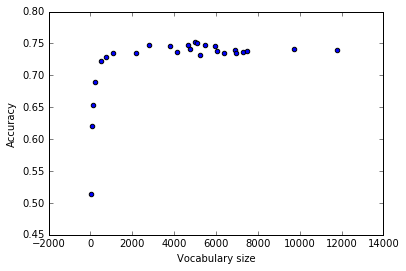

In [10]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    
    # calculate the sum of squared weights for a fitted logistic regression model.  Loop through
    # all of the weights from the model and square them.  Sum those squares while looping.
    def sumSQWeights(logReg):
        sum_squared_weights = 0
        for i in range(len(logReg.coef_)):
            for j in range(len(logReg.coef_[i])):
                sum_squared_weights += pow(logReg.coef_[i][j],2)
        return sum_squared_weights

    # calculate a new vocabulary from the non-zero features of a logistic regression.
    def vocabFromNZFeatures(logReg, cv):
        # initialize the newVocab list to store the new vocab list that will be created
        newVocab = []
        # get the feature names from the count vectorizer
        feature_names = cv.get_feature_names()
        # loop through the weights from logistic regression, find all of the non-zero
        # weights and create a new vocab list from them.
        for i in range(len(logReg.coef_)):
            for j in range(len(logReg.coef_[i])):
                # store the weight of the feature
                weight = logReg.coef_[i][j]
                if weight != 0:
                    # find the name of the feature
                    feature_name = feature_names[j]
                    # append the feature name and the weight to the 
                    if feature_name not in newVocab:
                        newVocab.append(feature_name)
        return newVocab, len(newVocab)
    
    # create new feature vectors from a voculary and the train and dev data
    def fvFromVocab(vocab, train_data, dev_data):
        # Create a CountVectorizer object that will transform the text data into a feature vector
        cv = CountVectorizer(vocabulary=vocab)
        # Transform the train_data into a feature vector
        train_fv = cv.fit_transform(train_data)
        # Transform the dev_data into a feature vector.  In order to use the same vocabulary as the training data here,
        # do not re-fit the data with the fit_transform method.  Just use the transform method with the dev_data.
        dev_fv = cv.transform(dev_data)
        return train_fv, dev_fv
    
    # Create a CountVectorizer object that will transform the text data into a feature vector
    cv = CountVectorizer()
    # Transform the train_data into a feature vector
    train_fv = cv.fit_transform(train_data)
    
    # Create a new logisticRegression classifier with the best C with L1 penalty
    best_C = 0.4
    logRegL1 = LogisticRegression(penalty='l1')
    logRegL1.fit(train_fv, train_labels)
    # Calculate and print the count of non-zero coefficients
    L1NZF = np.count_nonzero(logRegL1.coef_)
    print('For L1 Penalty, the number of non-zero features is: %d \n' % (L1NZF))
 
    # Create a new logisticRegression classifier with the best C with L2 penalty
    logRegL2 = LogisticRegression(penalty='l2')
    logRegL2.fit(train_fv, train_labels) 
    # Calculate and print the count of non-zero coefficients
    L2NZF = np.count_nonzero(logRegL2.coef_)
    print('For L2 Penalty, the number of non-zero features is: %d \n' % (L2NZF))
    print('The non-zero features for the L2 penalty is %d larger than the L1 penalty.' % (L2NZF-L1NZF))

    # Initialize lists to store the vocabulary sizes and accuracies for different values of C
    vocabSizes = []
    accuracies = []
    # Create a list of values of C values to test
    #C_vals = list(range(1,200,2))
    C_vals = [.01, .03, .05, .1, .3, .5, 1, 5, 10, 20, 25, 30, 33, 35, 37, 40, 45,
              50, 55, 60, 70, 80, 90, 100, 150, 200]
    # Initialize variables to keep track of the best score and the corresponding best value of C.
    best_C = 0
    best_score = 0 
    # Loop through each value of C, create an logistic regression classifier with L1 penalty and the value of
    # c from the iteration loop, then create a new vocabulary from the non-zero features of that regression, then
    # use that vocabulary to create new training and dev feature vectors, then create a logistic regression
    # classifier with L2 penalty and score it with the new training and dev feature vectors.  Store all of the
    # vocabulary sizes and scores in the vocabSizes and accuracies lists, respectively.
    # Keep track of the best score and best corresponding C value.  Print the C value and score for each iteration.
    # After the loop is complete, print the best value of C corresponding to the best score.
    for c in C_vals:
        # Create an LR classifier with penalty = L1
        logRegL1 = LogisticRegression(C=c, penalty='l1', tol=0.01)
        logRegL1.fit(train_fv, train_labels) 
        # Create a new vocab from the non-zero features of the L1 regression
        vocab, vocabSize = vocabFromNZFeatures(logRegL1, cv)
        # Append the new vocabSize to the list of vocab sizes
        vocabSizes.append(vocabSize)
        # Create new feature vectors from the new vocabulary
        train_fv_sparse, test_fv_sparse = fvFromVocab(vocab, train_data, test_data)

        # Create an LR classifier with penalty = L2
        logRegL2 = LogisticRegression(penalty='l2')
        logRegL2.fit(train_fv_sparse, train_labels)
        # Calculate the accuracy of the L2 classifier with the new feature vectors
        accuracy = logRegL2.score(test_fv_sparse, test_labels)
        accuracies.append(accuracy)
        if accuracy > best_score:
            best_score = accuracy
            best_C = c
        #print('C = %f: accuracy = %f, vocab = %d' % (c, accuracy, vocabSize))
    print('Best C-value is %f, corresponding to best accuracy of %f \n' % (best_C, best_score))
    
    # Plot the vocabulary sizes and accuracies collected from looping through the different values of C
    plt.scatter(vocabSizes,accuracies)
    plt.xlabel('Vocabulary size')
    plt.ylabel('Accuracy')
    plt.show()
        
    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [10]:
def P7():
    ### STUDENT START ###
    # Create a TfidfVectorizer object that will transform the text data into a feature vector
    tv = TfidfVectorizer()
    # Transform the train_data into a feature vector
    train_fv = tv.fit_transform(train_data)
    # Transform the dev_data into a feature vector.  In order to use the same vocabulary as the training data here,
    # do not re-fit the data with the fit_transform method.  Just use the transform method with the dev_data.
    dev_fv = tv.transform(dev_data)

    # Create a new logisticRegression classifier with the C=100 
    logRegL2 = LogisticRegression(C=100, penalty='l2')
    # Fit the classifier with the training data
    logRegL2.fit(train_fv, train_labels)
    # Predict the classes on the dev data
    predict = logRegL2.predict(dev_fv)
    # Store the predicted probabilities in a variable
    predict_prob = logRegL2.predict_proba(dev_fv)
    # Calculate the f1_score for the model and print it out.
    f1_score =  metrics.f1_score(dev_labels, predict, average='weighted')
    print('L2 Logistic Regression F1 Score: %f \n' % (f1_score))
    
    # Calculate R = maximum predicted probability / predicted probability of the correct label
    # Initialize a dictionary to store all of the Rs
    Rs = {}
    Classes = {}
    # Loop through all of the predictions and calculate R.  Store R in a dictionary.  The key
    # will be the index of the predict list and the value will be the R value for that index.
    for i in range(len(predict)):
        correct_class = dev_labels[i]
        max_pred_prob = max(predict_prob[i])
        pred_prob_label = predict_prob[i][correct_class]
        R = max_pred_prob / pred_prob_label
        Rs[i] = R 
        Classes[i] = [correct_class, predict[i]]
        #print('i is %d, pred_c is %d, max_p is %f, pred_p is %f, R is %f' % (i, correct_class, max_pred_prob,
        #                                                                      pred_prob_label, R))
    # Print the documents with the highest R values by sorting the dictionary in descending order and looking
    # at the top values.
    for i in range(10):
        index = sorted(Rs, key=Rs.get, reverse=True)[i]
        print('\nINDEX is %d, R is %f, correct class is %d, pred class is %d\n' % (index, Rs[index],
                                                                                   Classes[index][0], Classes[index][1]))
        print(dev_data[index])
    
    ### STUDENT END ###
P7()

L2 Logistic Regression F1 Score: 0.759766 


INDEX is 215, R is 929.357525, correct calls is 3, pred class is 1

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a

ANSWER: TfidfVectorizer is different from CountVectorizer because the TfidfVectorizer does some additional scaling. It scales down the impact of terms that occur in a lot of documents in the group of documents.  It does this by adding a term called TF*IDF to the raw term frequencies.  TF = term frequency and IDF = inverse document frequency.  The multiplication by the IDF term (or division by DF = document frequency) is what scales down the impact of the terms that occur in many documents.  It seems to be making mistakes on documents that do not contain a lot of topic-specific words like.  It's possible that the really frequent topic specific words are being scaled down too much because they appear in a lot of documents within their own topic.  One way to fix this after you do the TF-IDF scaling, you could take the highest of the remaining frequencies and scale them up a little bit.  Also, these examples that it is getting wrong seem really difficult to classify.  I'm not sure using the regular CountVectorizer would get them right either.  The first example has references to Mormon, but also to computer words like Microsoft, ASCII and LaTeX.  I'm not sure how either system would classify it correctly.  Also, the examples that it got wrong are either really short or really long.  It's possible that the fact that IDF works on a document-only basis may disproportionately affect shorter or longer documents.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance